Welcome back, I'm sorry it took so long!  
In the third week of the [Data Analysis Tools](https://www.coursera.org/learn/data-analysis-tools/) course, we're calculating (Pearson's) correlation coefficient $r$ for two quantitative variables. Yay, no more grouping! Maybe you remember that my **Breast Cancer Causes Internet Usage!** (BCCIU) [project](http://lilithelina.tumblr.com/post/128347327089/choice-of-data) contains only numerical data - just like the whole [Gapminder](http://www.gapminder.org/) data subset we were given in the course - so being able to use the data as it is, that's nice for a change.

As before, the output will look lots better in the [nbviewer](http://nbviewer.ipython.org/github/LilithElina/Data-Analysis-and-Interpretation/tree/master/DataAnaT/Week%20Three%20-%20Pearson%20Correlation.ipynb) than on tumblr.

First up comes the code to prepare the raw data.

In [1]:
# activate inline plotting, should be first statement
%matplotlib inline

# load packages
import warnings                     # ignore warnings (e.g. from future, deprecation, etc.)
warnings.filterwarnings('ignore')   # for layout reasons, after I read and acknowledged them all!

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import scipy.stats                  # for pearson correlation

# read in data
data = pandas.read_csv("../gapminder.csv", low_memory=False)

# subset the data and make a copy to avoid error messages later on
sub = data[["country", "breastcancerper100th", "femaleemployrate", "internetuserate"]]
sub_data = sub.copy()

# change data types to numeric (NEW CODE!)
sub_data["breastcancerper100th"] = pandas.to_numeric(sub_data["breastcancerper100th"], errors="coerce")
sub_data["femaleemployrate"] = pandas.to_numeric(sub_data["femaleemployrate"], errors="coerce")
sub_data["internetuserate"] = pandas.to_numeric(sub_data["internetuserate"], errors="coerce")

# remove rows with missing values (copy again)
sub2 = sub_data.dropna()
sub_data2 = sub2.copy()

It's been a while since I last created [scatterplots](http://lilithelina.tumblr.com/post/131697215314/more-data-visualisation-python) of my data, so here they are again!

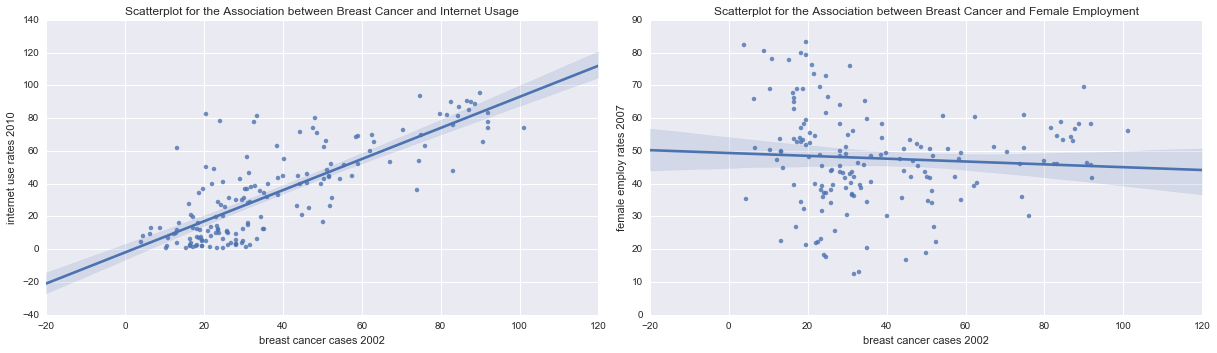

In [2]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="breastcancerper100th", y="internetuserate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('internet use rates 2010');
plt.title('Scatterplot for the Association between Breast Cancer and Internet Usage');

fig.add_subplot(122)
seaborn.regplot(x="breastcancerper100th", y="femaleemployrate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('female employ rates 2007');
plt.title('Scatterplot for the Association between Breast Cancer and Female Employment');

fig.tight_layout()
plt.show()

Perfoming Pearson correlation calculations in Python is pretty easy, as you can see below. The function `pearsonr` returns both $r$ and $p$ value - nothing more, nothing less.

In [3]:
# Pearson correlation
print ('association between internet usage and breast cancer cases')
print (scipy.stats.pearsonr(sub_data2['internetuserate'], sub_data2['breastcancerper100th']))

print ('\n\nassociation between female employment rates and breast cancer cases')
print (scipy.stats.pearsonr(sub_data2['femaleemployrate'], sub_data2['breastcancerper100th']))

association between internet usage and breast cancer cases
(0.7897404888680789, 8.7855961572495463e-36)


association between female employment rates and breast cancer cases
(-0.067921325832795226, 0.39045344185783881)


As we can see, there is a relatively strong linear relationship between breast cancer cases and internet use rates. This was to be expected, since the scatterplot shows the same. The correlation coefficient $r=0.79$ argues for a positive linear correlation and the associated $p<0.001$ says that it is very unlikely to get this result by chance.  
The scatterplot of female employment versus breast cancer looks more like a curve than linear, which is also expressed by the very weak correlation coefficient $r=-0.07$ and a high *p*-value ($p=0.39$ means there's an approximately 60% chance to get this result by chance rather than through a real effect).

It is interesting that there is no correlation between female employment rates and breast cancer cases in this approach - unlike to the previous statistical analyses using categorised variables ([here](http://lilithelina.tumblr.com/post/132593030304/data-analysis-anova-python) and [here](http://lilithelina.tumblr.com/post/133785457799/data-analysis-chi-square-python)). Both ANOVA and the $\chi^2$ test showed that only countries with few breast cancer cases have a significant correlation with (higher) female employment, which is something the Pearson correlation, using linear relationships, cannot possibly detect.

Lastly, we can also square the correlation coefficient - $r^2$ is the "coefficient of determination" and tells us how much of the variability of one variable can be explained by the variability in the other. Internet usage, for example, can explain around 62% ($r^2=0.62$) of the variability in breast cancer, while female employment is useless here, with only 0.5% ($r^2=0.0046$).

The question that remains is - how can we describe and test the relationship between female employment and breast cancer? The categorical tests have shown that there is a correlation there, but it's definitely not linear.